<a href="https://colab.research.google.com/github/levyashvin/exploratory-data-analysis/blob/main/males_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

22BDS0177 Yuva Yashvin

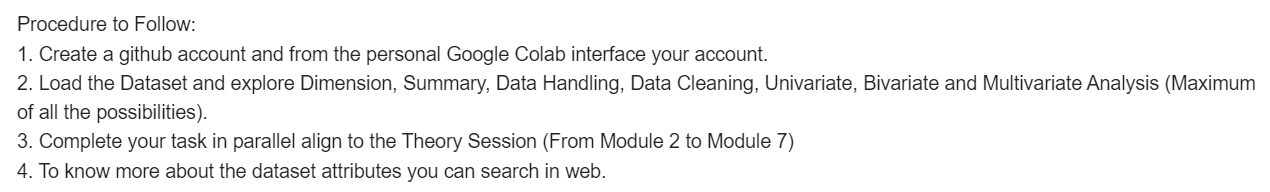

analysis of Males.csv file using python.

In [2]:
#packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading dataset into python

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Males.csv')
data.head()

,rownames,nr,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence
0,1,13,1980,14,1,no,other,no,no,1.197540,Business_and_Repair_Service,Service_Workers,north_east
1,2,13,1981,14,2,yes,other,no,no,1.853060,Personal_Service,Service_Workers,north_east
2,3,13,1982,14,3,no,other,no,no,1.344462,Business_and_Repair_Service,Service_Workers,north_east
3,4,13,1983,14,4,no,other,no,no,1.433213,Business_and_Repair_Service,Service_Workers,north_east
4,5,13,1984,14,5,no,other,no,no,1.568125,Personal_Service,"Craftsmen, Foremen_and_kindred",north_east


quick brief on each column. \
rownames = row index \
nr = group identifier  \
year = identifier year \
school = years of schooling \
exper = working experience \
union = part of a union? \
ethn = ethnicity \
maried = martial status \
health = health problems that year \
wage = hourly wage \
industry = work industry \
occupation = specific work \
residence = place of stay

important to note that data is a panel dataset or longitudinal data. as nr is used to identify 8 rows of data about the same male which are recorded for 8 consecutive years.

summary and dimensions analysis.

In [ ]:
print('shape',data.shape,'\n')
print('column names:\n',data.columns,'\n')
print(data.info())

shape (4360, 13) 

column names:
 Index(['rownames', 'nr', 'year', 'school', 'exper', 'union', 'ethn', 'maried',
       'health', 'wage', 'industry', 'occupation', 'residence'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4360 entries, 0 to 4359
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rownames    4360 non-null   int64  
 1   nr          4360 non-null   int64  
 2   year        4360 non-null   int64  
 3   school      4360 non-null   int64  
 4   exper       4360 non-null   int64  
 5   union       4360 non-null   object 
 6   ethn        4360 non-null   object 
 7   maried      4360 non-null   object 
 8   health      4360 non-null   object 
 9   wage        4360 non-null   float64
 10  industry    4360 non-null   object 
 11  occupation  4360 non-null   object 
 12  residence   3115 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 442.9+ KB
None


from this we can already see that 'residence' column has missing data.

In [ ]:
data.describe()

,rownames,nr,year,school,exper,wage
count,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000
mean,2180.500000,5262.058716,1983.500000,11.766972,6.514679,1.649147
std,1258.767916,3496.149815,2.291551,1.746181,2.825873,0.532609
min,1.000000,13.000000,1980.000000,3.000000,0.000000,-3.579079
25%,1090.750000,2329.000000,1981.750000,11.000000,4.000000,1.350717
50%,2180.500000,4569.000000,1983.500000,12.000000,6.000000,1.671143
75%,3270.250000,8406.000000,1985.250000,12.000000,9.000000,1.991086
max,4360.000000,12548.000000,1987.000000,16.000000,18.000000,4.051860


In [ ]:
# statistics on non-numerical data
data.describe(include=['object','bool'])

,union,ethn,maried,health,industry,occupation,residence
count,4360,4360,4360,4360,4360,4360,3115
unique,2,3,2,2,12,9,4
top,no,other,no,no,Manufacturing,"Craftsmen, Foremen_and_kindred",south
freq,3296,3176,2446,4286,1231,934,1333


Data cleaning and NaN filling

from the values above it is clear that the residence column is missing data. studying that first we get,

In [ ]:
#size of data missing in residence column
residence_percent = data['residence'].isnull().mean() * 100
missing_residence = data['residence'].isnull().sum()
print(f'residence column missing data = {residence_percent:.2f}%')

residence column missing data = 28.56%


~30% is too big a number to ignore. if we decide to just fill in with mode we will defintely intoduce a bias and if we remove the row altogether we will reduce our sample size heavily. best solution would be to determine if any relationship exists if other fields and perform a group filling.

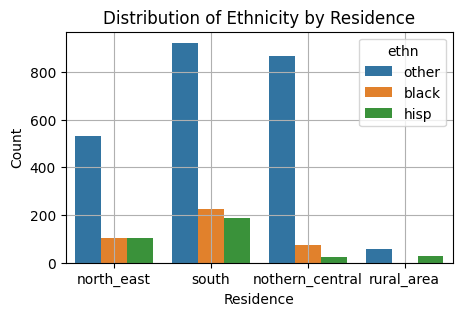

In [ ]:
#ethnicity distribution by residence
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x='residence', hue='ethn')
plt.title('Distribution of Ethnicity by Residence')
plt.xlabel('Residence')
plt.ylabel('Count')
plt.grid(True)
plt.show()

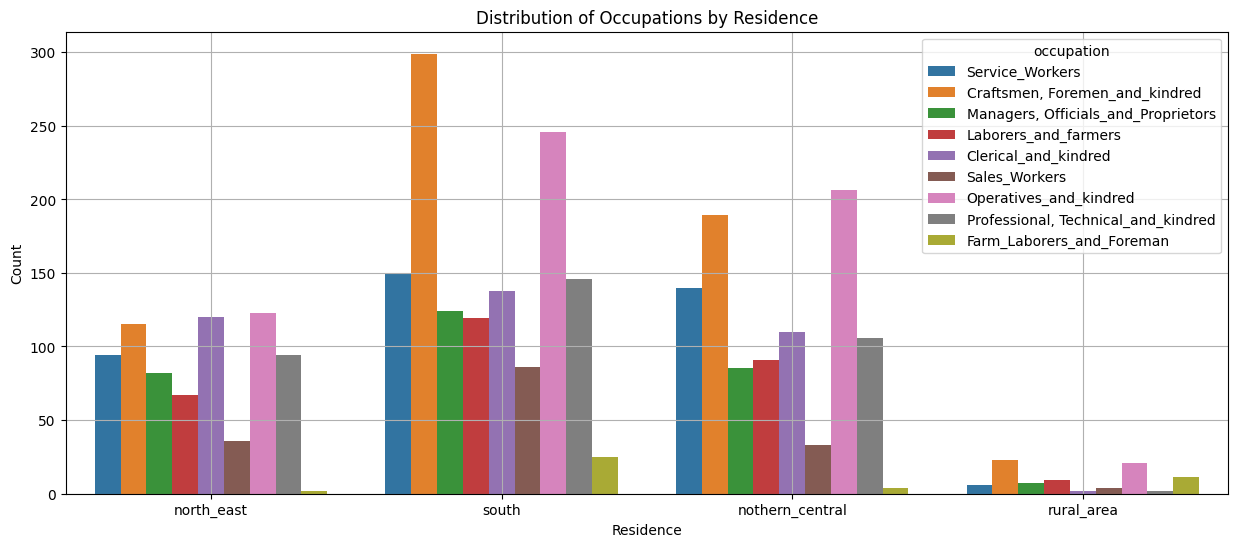

In [ ]:
#occupation distribution by residence
plt.figure(figsize=(15, 6))
sns.countplot(data=data, x='residence', hue='occupation')
plt.title('Distribution of Occupations by Residence')
plt.xlabel('Residence')
plt.ylabel('Count')
plt.grid(True)
plt.show()

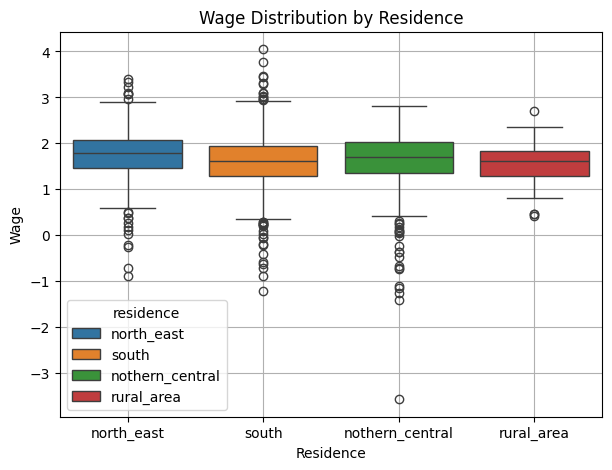

In [ ]:
#wage distribution by residence
plt.figure(figsize=(7, 5))
sns.boxplot(data=data, x='residence', y='wage', hue=data['residence'])
plt.title('Wage Distribution by Residence')
plt.xlabel('Residence')
plt.ylabel('Wage')
plt.grid(True)
plt.show()

From the above plots it actually makes it harder to determine how to fill in the missing values in residence column. since everything seems to show a pretty equal distribution it makes most sense to fill in the residence with every region equally or in proportion with existing data.

In [4]:
#initial proportions of each residence category
residence_counts = data['residence'].value_counts(normalize=True)
print(residence_counts)

residence
south              0.427929
nothern_central    0.309470
north_east         0.235313
rural_area         0.027287
Name: proportion, dtype: float64


In [5]:
#index of the missing residence values
missing_indices = data[data['residence'].isnull()].index

#generating random residence assignments based on existing proportions
filled_residences = np.random.choice(residence_counts.index, size=len(missing_indices), p=residence_counts.values)

#filling data
data.loc[missing_indices, 'residence'] = filled_residences

#proportions of the residence column after filling
data['residence'].value_counts(normalize=True)

,proportion
residence,
south,0.429817
nothern_central,0.308945
north_east,0.233716
rural_area,0.027523


now that the data cleaning is done we can proceed with data analysis. starting with data analysis.

univariate analysis.

In [6]:
#yearly summary of the data
univariate_summary = data.groupby('year').agg({
    'wage': ['mean', 'median', 'std', 'min', 'max'],
    'exper': ['mean', 'median', 'std', 'min', 'max'],
    'school': ['mean', 'median', 'std', 'min', 'max']
})

print(univariate_summary)

          wage                                              exper         \
          mean    median       std       min       max       mean median   
year                                                                       
1980  1.393477  1.448000  0.557501 -1.113822  2.821783   3.014679    3.0   
1981  1.512867  1.557002  0.530712 -1.417066  2.937463   4.014679    4.0   
1982  1.571667  1.579274  0.497440 -1.216737  3.472707   5.014679    5.0   
1983  1.619263  1.637117  0.480838 -0.790987  3.229487   6.014679    6.0   
1984  1.690295  1.703647  0.524181 -3.579079  3.777492   7.014679    7.0   
1985  1.739410  1.765962  0.522506 -1.155182  4.051860   8.014679    8.0   
1986  1.799719  1.830163  0.515032 -0.981204  3.397526   9.014679    9.0   
1987  1.866479  1.892331  0.466890 -0.191009  3.343164  10.014679   10.0   

                           school                           
           std min max       mean median       std min max  
year                                     

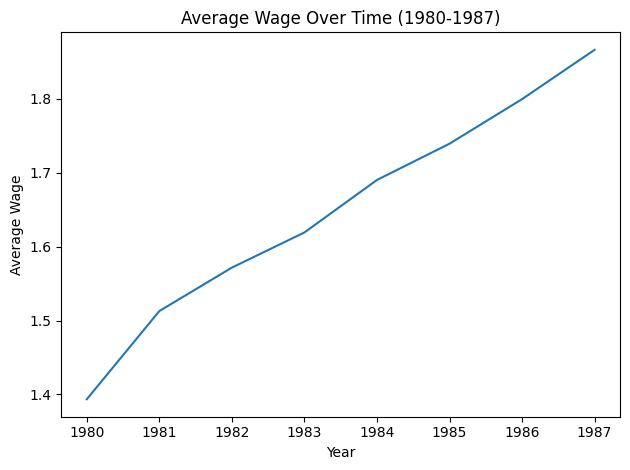

In [14]:
#distribution of wage over time
sns.lineplot(data=data, x='year', y='wage', errorbar=None)
plt.title('Average Wage Over Time (1980-1987)')
plt.xlabel('Year')
plt.ylabel('Average Wage')

plt.tight_layout()
plt.show()

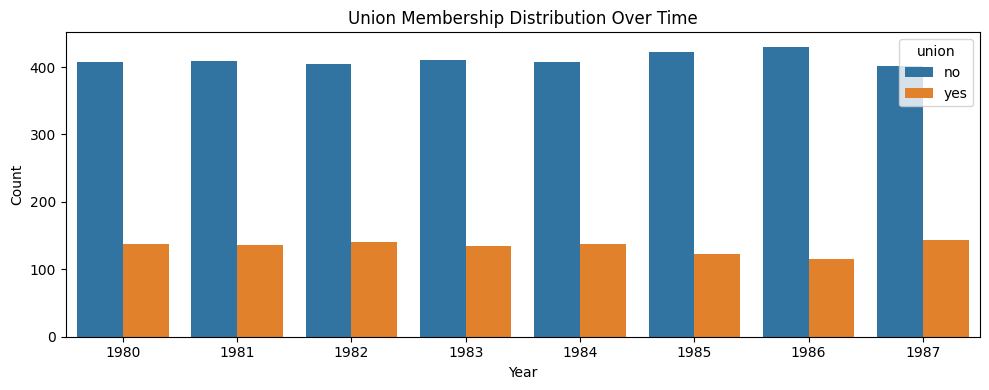

In [13]:
#distribution of union membership over time
plt.figure(figsize=(10, 4))
sns.countplot(data=data, x='year', hue='union')
plt.title('Union Membership Distribution Over Time')
plt.xlabel('Year')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

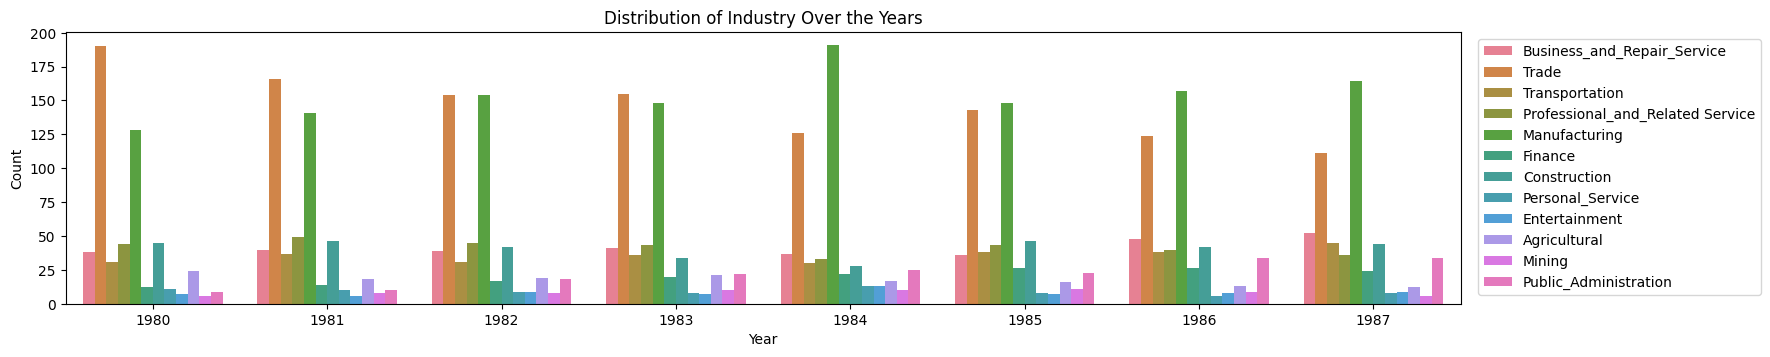

In [30]:
#distribution of industry over the years
plt.figure(figsize=(18, 12))
plt.subplot(3, 1, 1)
sns.countplot(data=data, x='year', hue='industry')
plt.title('Distribution of Industry Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1))
plt.show()

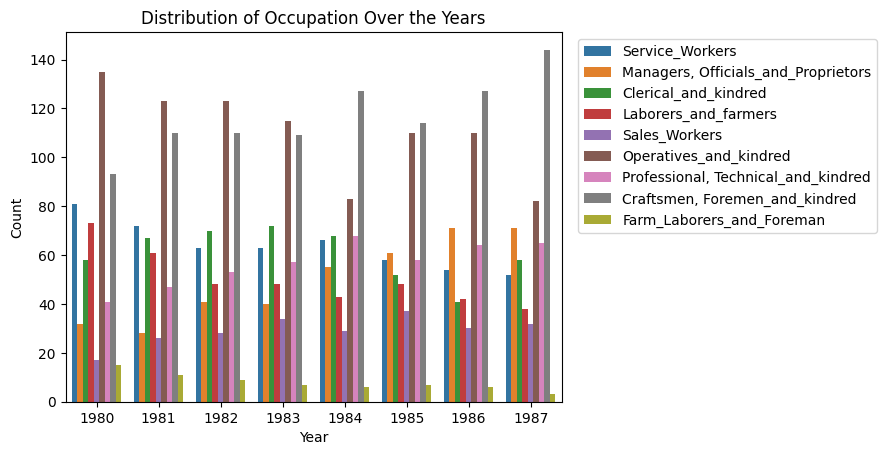

In [28]:
#distribution of occupation over the years
sns.countplot(data=data, x='year', hue='occupation')
plt.title('Distribution of Occupation Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc='upper right', bbox_to_anchor=(1.65, 1))
plt.show()

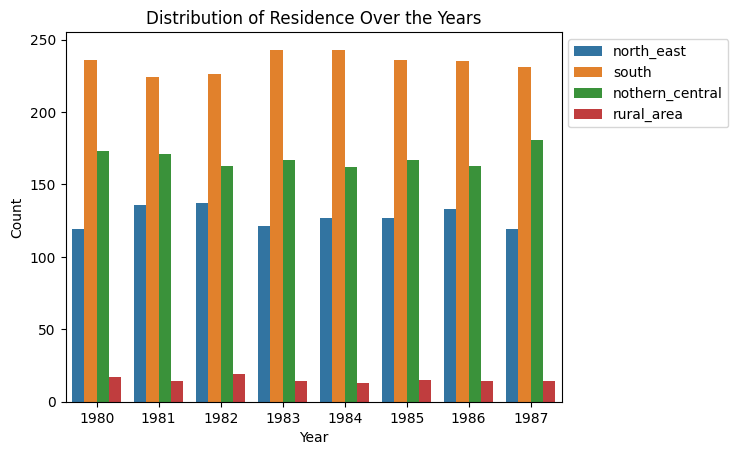

In [36]:
# Plot 3: Distribution of Residence Over the Years
sns.countplot(data=data, x='year', hue='residence')
plt.title('Distribution of Residence Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1))
plt.show()